In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as sm
import sklearn.model_selection as ms

In [2]:
#import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
from collections import Counter


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [3]:
df = pd.read_csv("correlation.csv")

In [ ]:
df["HeartDisease"].unique()

In [ ]:
df.info()

In [ ]:
1   BMI               319795 non-null  float64

 2   Smoking           319795 non-null  object 

 3   AlcoholDrinking   319795 non-null  object 

 4   Stroke            319795 non-null  object 

 5   PhysicalHealth    319795 non-null  float64

 6   MentalHealth      319795 non-null  float64

 7   DiffWalking       319795 non-null  object 

 8   Sex               319795 non-null  object 

 9   AgeCategory       319795 non-null  object 

 10  Race              319795 non-null  object 

 11  Diabetic          319795 non-null  object 

 12  PhysicalActivity  319795 non-null  object 

 13  GenHealth         319795 non-null  object 

 14  SleepTime         319795 non-null  float64

 15  Asthma            319795 non-null  object 

 16  KidneyDisease     319795 non-null  object 

 17  SkinCancer        319795 non-null  object 

dtypes: float64(4), object(14)


In [ ]:
df.describe()

In [ ]:

BMI	PhysicalHealth	MentalHealth	SleepTime
count	319795.000000	319795.00000	319795.000000	319795.000000
mean	28.325399	3.37171	3.898366	7.097075
std	6.356100	7.95085	7.955235	1.436007
min	12.020000	0.00000	0.000000	1.000000
25%	24.030000	0.00000	0.000000	6.000000
50%	27.340000	0.00000	0.000000	7.000000
75%	31.420000	2.00000	3.000000	8.000000
max	94.850000	30.00000	30.000000	24.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.MentalHealth.plot(kind='hist')

In [ ]:
ax=df.MentalHealth.plot(kind='hist',bins=10)
ax.set_xlabel('MentalHealth');


In [ ]:
df.HeartDisease.plot(kind='hist')

In [ ]:
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
!pip install plotly
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Command to tell Python to actually display the graphs
%matplotlib inline

# open-source Python graphing library for building beautiful, interactive visualizations, and showing exact numbers
!pip install plotly
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
X = df.drop(['HeartDisease', 'MAH_1', 'probability', 'PrimaryLast', 'pro'], axis=1)
y = df['HeartDisease']

In [59]:
# SMOTE to make the data balance 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [60]:
# number of examples after applying the algorithm
len(X_res)

516040

In [61]:
# of examples for each class
print(sorted(Counter(y_res).items()))

[(0, 258020), (1, 258020)]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(361228, 17) (154812, 17)


In [65]:
df['HeartDisease'].value_counts()

0    258020
1     21017
Name: HeartDisease, dtype: int64

In [66]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (361228, 17)

Shape of test set :  (154812, 17)

Percentage of classes in training set:

1    0.500282

0    0.499718

Name: HeartDisease, dtype: float64

Percentage of classes in test set:

0    0.500659

1    0.499341

Name: HeartDisease, dtype: float64


In [67]:
##Percentage of classes in training set: * the follwoing result before applying SMOTE techniques 
0    0.924403 1    0.075597 
Name: HeartDisease, dtype: float64 means that in the training set, 92.44% of the samples belong to class 0 (no heart disease) 
and 7.56% belong to class 1 (heart disease).
Percentage of classes in test set: 
    0    0.925327 1    0.074673 
    Name: HeartDisease, dtype: float64 means that in the test set, 92.53% of the samples belong to class 0 (no heart disease) 
            and 7.47% belong to class 1 (heart disease).

SyntaxError: invalid syntax (1221419601.py, line 2)

In [68]:
#The training and test sets are both imbalanced because  * the foolowing conclusion before applying the SMOTE techniques  
the percentage of samples in each class is not equal. 
In this case, the majority class is “no heart disease”
and the minority class is “heart disease”. 
Imbalanced datasets can make it difficult 
to train machine learning models that accurately predict the minority class.

SyntaxError: invalid character '“' (U+201C) (3923744097.py, line 3)

In [69]:
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Command to tell Python to actually display the graphs
%matplotlib inline




ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (E:\New folder\lib\site-packages\sklearn\metrics\__init__.py)

In [70]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [71]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [31]:
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(X_test, y_test)

DecisionTreeClassifier(criterion='entropy', random_state=0)

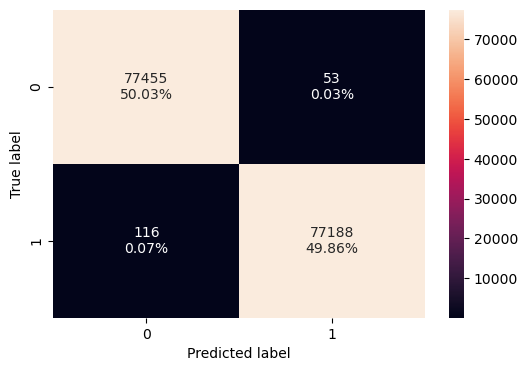

In [72]:
confusion_matrix_sklearn(model, X_test, y_test)


In [73]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.998908,0.998499,0.999314,0.998906


In [44]:
#In this case, The accuracy of your model is 0.997996, 
which means that it correctly classified 99.80% of the instances 
in the test set. The recall is 0.997449, which means that it 
correctly identified 99.74% of the actual positive instances in the test set.
The precision is 0.998543, which means that when it predicted a positive instance, it was correct 99.85% of the time. The F1 score is 0.997996, 
which is a weighted average of precision and recall.

SyntaxError: invalid syntax (163718332.py, line 2)

In [45]:
feature_names = list(X_test.columns)
print(feature_names)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [36]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

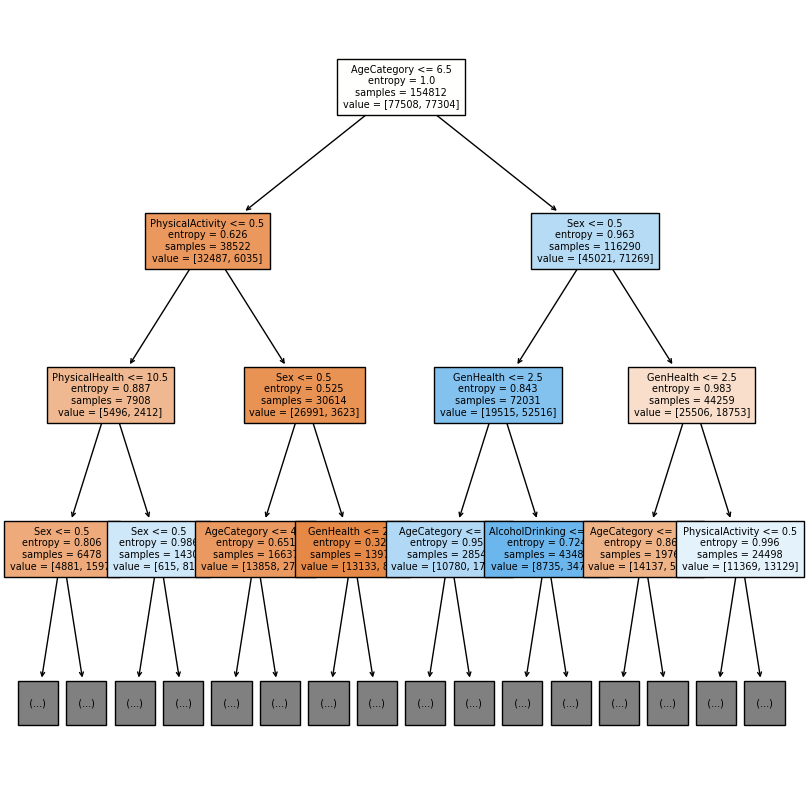

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    model,
    max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=7,
    node_ids=False,
    class_names=None,
)

# Loop through each output element (tree node)
for o in out:
    arrow = o.arrow_patch  # Get the arrow_patch from the node
    if arrow is not None:
        arrow.set_edgecolor("black")  # Set arrow edge color to black
        arrow.set_linewidth(1)       # Set arrow linewidth

plt.show()



In [38]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- AgeCategory <= 6.50

|   |--- PhysicalActivity <= 0.50

|   |   |--- PhysicalHealth <= 10.50

|   |   |   |--- Sex <= 0.50

|   |   |   |   |--- AgeCategory <= 4.50

|   |   |   |   |   |--- SleepTime <= 5.50

|   |   |   |   |   |   |--- MentalHealth <= 1.50

|   |   |   |   |   |   |   |--- BMI <= 43.12

|   |   |   |   |   |   |   |   |--- BMI <= 25.08

|   |   |   |   |   |   |   |   |   |--- SleepTime <= 4.50

|   |   |   |   |   |   |   |   |   |   |--- weights: [10.00, 0.00] class: 0

|   |   |   |   |   |   |   |   |   |--- SleepTime >  4.50

|   |   |   |   |   |   |   |   |   |   |--- BMI <= 24.34

|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9

|   |   |   |   |   |   |   |   |   |   |--- BMI >  24.34

|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1

|   |   |   |   |   |   |   |   |--- BMI >  25.08

|   |   |   |   |   |   |   |   |   |--- AgeCategory <= 2.50

|   |   |   |   |   |   |   |   |   |   |--- wei

In [39]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_test.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp

BMI               0.346530

AgeCategory       0.184754

SleepTime         0.077934

PhysicalHealth    0.061660

MentalHealth      0.058791

Sex               0.056598

GenHealth         0.055531

Smoking           0.032333

Race              0.031423

PhysicalActivity  0.023473

Diabetic          0.020596

DiffWalking       0.012564

AlcoholDrinking   0.012068

Asthma            0.010846

SkinCancer        0.007808

Stroke            0.004220

KidneyDisease     0.002870


In [40]:
#In this case, BMI has the highest importance with a value of 0.343753 
followed by AgeCategory with a value of 0.187294.

SyntaxError: invalid syntax (3670266359.py, line 2)

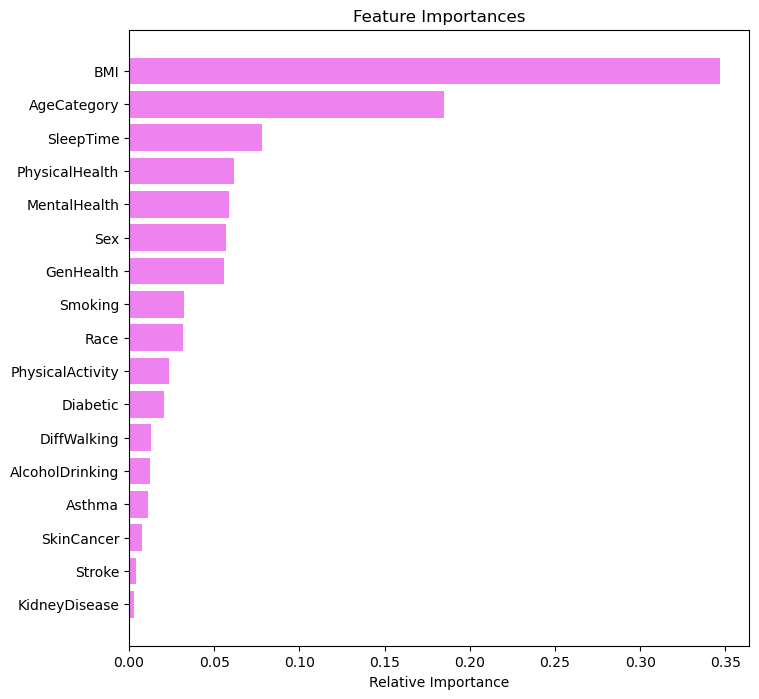

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()